# Step 1 import data and necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='mylog.log', mode='a')
formatter = logging.Formatter('%(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)
logging.info('We are starting the project')

In [2]:
df = pd.read_csv('concrete_data.csv')
logging.info('Data Import.')

# Step 2 Overview

In [3]:
df
logging.info('Starting Overview')

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [6]:
df.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

In [7]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# Step 3 Missing Values

In [9]:
logging.info('Missing Values')

ans = df['cement'] == 0
ans.sum()

0

In [10]:
ans = df['blast_furnace_slag'] == 0
ans.sum()

471

In [11]:
ans = df['fly_ash'] == 0
ans.sum()

566

In [12]:
ans = df['water'] == 0
ans.sum()

0

In [13]:
ans = df['superplasticizer'] == 0
ans.sum()


379

In [14]:
ans = df['fine_aggregate '] == 0
ans.sum()

0

In [15]:
df['blast_furnace_slag'].replace(0, df['blast_furnace_slag'].mean())

0        73.895825
1        73.895825
2       142.500000
3       142.500000
4       132.400000
           ...    
1025    116.000000
1026     73.895825
1027    139.400000
1028    186.700000
1029    100.500000
Name: blast_furnace_slag, Length: 1030, dtype: float64

In [16]:
df['age'].max(),df['age'].min()

(365, 1)

365 cannot be years so we will assume it as days




In [17]:
df['fly_ash'].replace(0, df['fly_ash'].mean())

0        54.18835
1        54.18835
2        54.18835
3        54.18835
4        54.18835
          ...    
1025     90.30000
1026    115.60000
1027    108.60000
1028     54.18835
1029     78.30000
Name: fly_ash, Length: 1030, dtype: float64

In [18]:
df['superplasticizer'].replace(0, df['superplasticizer'].mean())

0        2.50000
1        2.50000
2        6.20466
3        6.20466
4        6.20466
          ...   
1025     8.90000
1026    10.40000
1027     6.10000
1028    11.30000
1029     8.60000
Name: superplasticizer, Length: 1030, dtype: float64

In [19]:
df.head(1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99


# Step 4 EDA

<BarContainer object of 1030 artists>

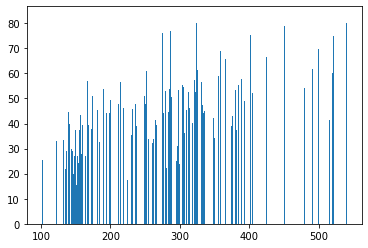

In [20]:
# matplotlib
logging.info('Starting EDA')

plt.bar(df['cement'],df['concrete_compressive_strength'])

<BarContainer object of 1030 artists>

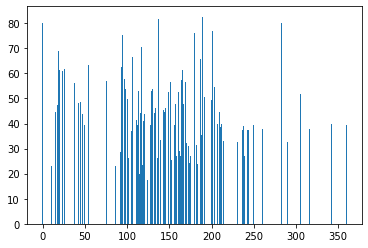

In [21]:
plt.bar(df['blast_furnace_slag'],df['concrete_compressive_strength'])

<BarContainer object of 1030 artists>

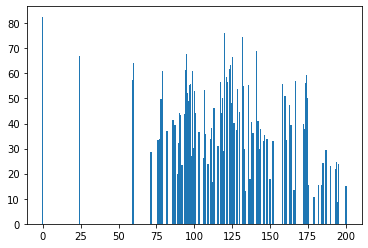

In [22]:
plt.bar(df['fly_ash'],df['concrete_compressive_strength'])

fly_ash   Highly Dense From 75 to 200

<BarContainer object of 1030 artists>

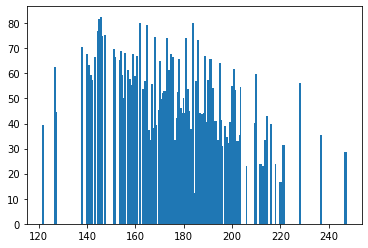

In [23]:
plt.bar(df['water'],df['concrete_compressive_strength'])

water Highly Dense From 135 to 225

<BarContainer object of 1030 artists>

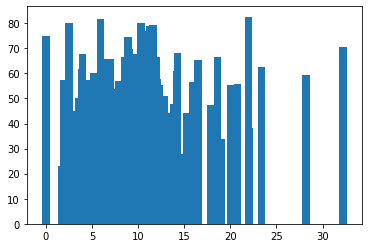

In [24]:
plt.bar(df['superplasticizer'],df['concrete_compressive_strength'])

superplasticizer Highly dense from 0 to 24

<BarContainer object of 1030 artists>

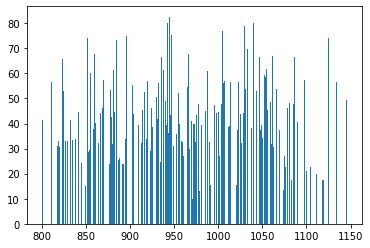

In [25]:
plt.bar(df['coarse_aggregate'],df['concrete_compressive_strength'])

<BarContainer object of 1030 artists>

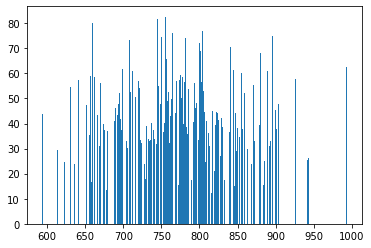

In [26]:
plt.bar(df['fine_aggregate '],df['concrete_compressive_strength'])

fine_aggregate Highly dense from 600 to 900

<BarContainer object of 1030 artists>

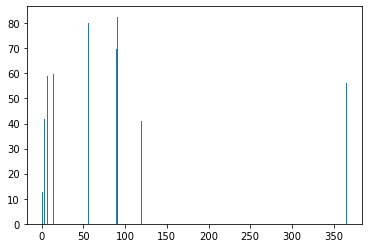

In [27]:
plt.bar(df['age'],df['concrete_compressive_strength'])

# Step 5 Treating Outliers

In [ ]:
logging.info('Starting Treating Outliers')

In [28]:
# dropfly_ash1 = df['fly_ash'] > 200
# dropfly_ash2 = df['fly_ash'] < 75

# dropwater1 =  df['water'] < 135
# dropwater2 =  df['water'] > 225

# dropsuper =  df['superplasticizer'] > 24

# dropfine1 =  df['fine_aggregate '] < 600
# dropfine2 =  df['fine_aggregate '] > 900

In [29]:
# def column_edit_flyash(ash):
#     if (ash < 75) or (ash > 200):
#       return df.drop(ash)
#     else:
#       return df['ash']

In [30]:
# df[df['fly_ash']>200] = 0

In [31]:
# df.drop(0, inplace = True)

In [32]:
df[df['fly_ash']>200] = 0
df[df['fly_ash']<75] = 0

In [33]:
df[df['water'] < 135] = 0
df[df['water'] > 225] = 0

In [34]:
df[df['superplasticizer'] > 24] = 0

In [35]:
df[df['fine_aggregate '] < 600]=0
df[df['fine_aggregate '] > 900]=0

In [36]:
df['fly_ash'].replace(0, df['fly_ash'].mean())


0        49.512816
1        49.512816
2        49.512816
3        49.512816
4        49.512816
           ...    
1025     90.300000
1026    115.600000
1027    108.600000
1028     49.512816
1029     78.300000
Name: fly_ash, Length: 1030, dtype: float64

In [37]:
df['water'].replace(0, df['water'].mean())

0        70.24699
1        70.24699
2        70.24699
3        70.24699
4        70.24699
          ...    
1025    179.60000
1026    196.00000
1027    192.70000
1028     70.24699
1029    200.60000
Name: water, Length: 1030, dtype: float64

In [38]:
df['superplasticizer'].replace(0, df['superplasticizer'].mean())

0        3.618447
1        3.618447
2        3.618447
3        3.618447
4        3.618447
          ...    
1025     8.900000
1026    10.400000
1027     6.100000
1028     3.618447
1029     8.600000
Name: superplasticizer, Length: 1030, dtype: float64

In [39]:
df['fine_aggregate '].replace(0, df['fine_aggregate '].mean())

0       310.876311
1       310.876311
2       310.876311
3       310.876311
4       310.876311
           ...    
1025    768.300000
1026    813.400000
1027    780.000000
1028    310.876311
1029    761.500000
Name: fine_aggregate , Length: 1030, dtype: float64

# Step 6 Splitting data into train and test

In [ ]:
logging.info('Starting Splitting data into train and test')

In [40]:
X = df[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age']]
y = df['concrete_compressive_strength']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 999, train_size = 0.75)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((772, 8), (258, 8), (772,), (258,))

# Step 7 Model testing and selection

In [ ]:
logging.info('Model testing and selection')

In [43]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [44]:
r2_Linear_Regression = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred) 
MSE = mean_squared_error(y_test, y_pred)
rmse = sqrt(MSE)
print('R2 score for Linear Regression:',r2_Linear_Regression)
print('Mean Absolute Error for Linear Regression: ',MAE)
print('Mean Squared Error for Linear Regression: ',MSE)
print("Root Mean Squared Error for Linear Regression: ",rmse)

R2 score for Linear Regression: 0.9387850004711885
Mean Absolute Error for Linear Regression:  2.255037188348573
Mean Squared Error for Linear Regression:  21.837302876063955
Root Mean Squared Error for Linear Regression:  4.673040003687531


In [45]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [46]:
r2_KNeighborsRegressor = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred) 
MSE = mean_squared_error(y_test, y_pred)
rmse = sqrt(MSE)
print('R2 score for KNeighbors Regressor:',r2_KNeighborsRegressor)
print('Mean Absolute Error for KNeighbors Regressor: ',MAE)
print('Mean Squared Error for KNeighbors Regressor: ',MSE)
print("Root Mean Squared Error for KNeighbors Regressor: ",rmse)

R2 score for KNeighbors Regressor: 0.9186048113635202
Mean Absolute Error for KNeighbors Regressor:  2.546434108527132
Mean Squared Error for KNeighbors Regressor:  29.03620682170542
Root Mean Squared Error for KNeighbors Regressor:  5.388525477503602


In [47]:
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

In [48]:
r2_Lasso = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred) 
MSE = mean_squared_error(y_test, y_pred)
rmse = sqrt(MSE)
print('R2 score for Lasso:',r2_Lasso)
print('Mean Absolute Error for Lasso: ',MAE)
print('Mean Squared Error for Lasso: ',MSE)
print("Root Mean Squared Error for Lasso: ",rmse)

R2 score for Lasso: 0.9374681733609838
Mean Absolute Error for Lasso:  2.2823753099296757
Mean Squared Error for Lasso:  22.307056247987465
Root Mean Squared Error for Lasso:  4.723034643953764


In [49]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

In [50]:
r2_DecisionTreeRegressor = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred) 
MSE = mean_squared_error(y_test, y_pred)
rmse = sqrt(MSE)
print('R2 score for Decision Tree:',r2_DecisionTreeRegressor)
print('Mean Absolute Error for Decision Tree: ',MAE)
print('Mean Squared Error for Decision Tree: ',MSE)
print("Root Mean Squared Error for Decision Tree: ",rmse)

R2 score for Decision Tree: 0.9190410392719436
Mean Absolute Error for Decision Tree:  1.9717054263565892
Mean Squared Error for Decision Tree:  28.880590697674418
Root Mean Squared Error for Decision Tree:  5.37406649546453


In [63]:
rf = RandomForestRegressor(n_estimators=1000,max_depth=10, min_samples_leaf=100,n_jobs=4,random_state=22)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [64]:
r2_RandomForestRegressor = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred) 
MSE = mean_squared_error(y_test, y_pred)
rmse = sqrt(MSE)
print('R2 score for Random Forest:',r2_RandomForestRegressor)
print('Mean Absolute Error for Random Forest: ',MAE)
print('Mean Squared Error for Random Forest: ',MSE)
print("Root Mean Squared Error for Random Forest: ",rmse)

R2 score for Random Forest: 0.825870528126305
Mean Absolute Error for Random Forest:  4.21738205183622
Mean Squared Error for Random Forest:  62.1174229555494
Root Mean Squared Error for Random Forest:  7.881460712047571


 # Step 8 Pickling

In [ ]:
logging.info('Start Pi')
import pickle

In [ ]:
pickle.dump(lasso,open('lasso.pkl','wb'))